### Two Sample T-Test on Gaussian Variables: Some experiments

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import ttest_ind as ttest

**Setup**

*The two sample t-test is a statistical test for the hypothesis that two distributions have the same mean.*

Let $X_1,...,X_n$ iid $\sim \mathcal{N}(\mu, \sigma_x^2)$ and  $Y_1,...,Y_n$ iid $\sim \mathcal{N}(\mu + \gamma, \sigma_y^2)$, with X and Y independent.

Classical student's t-test assumes $\sigma_x^2 = \sigma_y^2$. If this assumption is not made the test is Welch's test (selected by setting `equal_var=True`).

The null hypothesis is $H_0 : \gamma = 0$, ie. both distributions have the same mean.

The pivot is (for $\gamma = 0$),

$
\begin{align*}
Z(X,Y) := \frac{\bar{X} - \bar{Y}}{S}\sqrt{\frac{nm}{n+m}},
\end{align*}
$

where $S$ is the pooled unbiased sample variance. If $X,Y$ are normally distributed, then $Z$ follows a Student-t distribution with $n+m-2$ degrees of freedom. If we want to test deviations in both directions (ie. $\mathbb{E}[X-Y] > 0$ and $\mathbb{E}[X-Y] < 0$) the test is two tailed, and the p-value is (for a given pivot $\bar{z}$),

$
\mathbb{P}\left(|Z|>\bar{z}\right)
$

Note: the implementation in `scipy.stats.ttest_ind` is two tailed.

In [2]:
N = (10**(np.arange(0.5,5,0.5))).round().astype(int)
trials = 100
mu = 0
gamma = 0
sigma_x = 1
sigma_y = 1
alpha = 0.05

print("SETUP\nno. of samples: %s" % N)
print("no. of trials for each sample size: %d" % trials)
print("X ~ N(%0.2f, %0.2f)" % (mu, sigma_x))
print("Y ~ N(%0.2f, %0.2f)" % (mu + gamma, sigma_y))
print("In this case, the null hypothesis is %s" % (gamma == 0))

SETUP
no. of samples: [    3    10    32   100   316  1000  3162 10000 31623]
no. of trials for each sample size: 100
X ~ N(0.00, 1.00)
Y ~ N(0.00, 1.00)
In this case, the null hypothesis is True


Text(0, 0.5, 'rejection %')

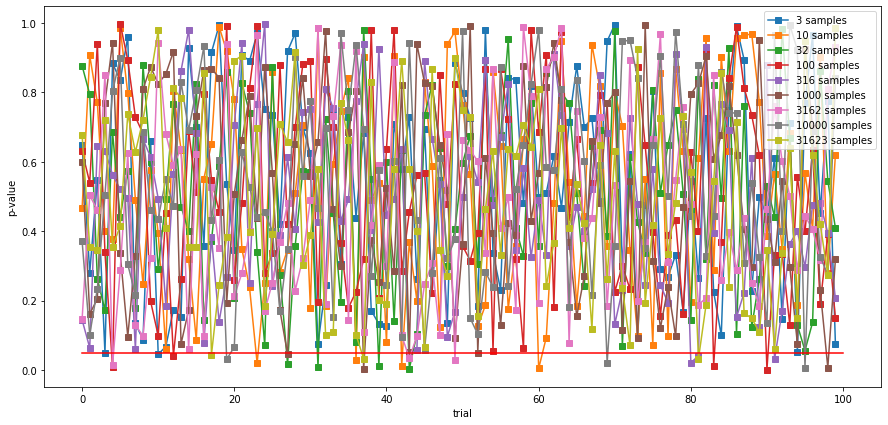

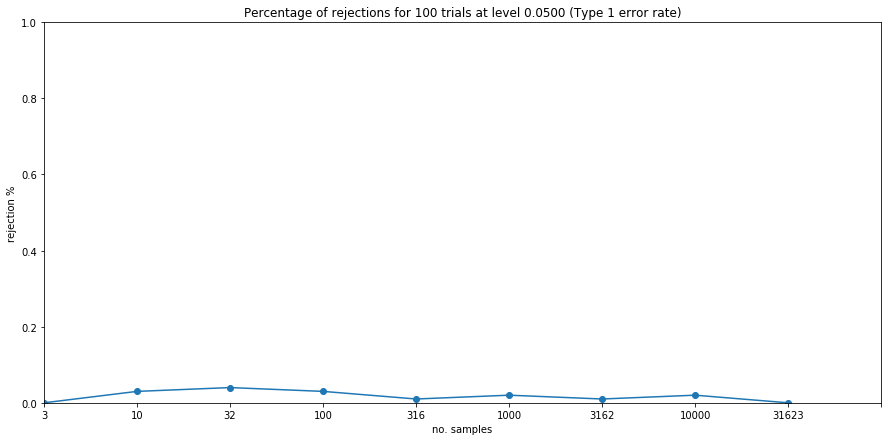

In [3]:
# Run tests and plot results
plt.figure(figsize=(15,7))
rejected = np.zeros(len(N))
for i,n in enumerate(N):
    np.random.seed(40)
    X = np.random.normal(mu, sigma_x,size=(trials,n))
    Y = np.random.normal(mu + gamma, sigma_y, size=(trials,n))
    result = ttest(X, Y, axis=1, equal_var=True)
    plt.plot(result.pvalue, "-s", label="%d samples" % n)
    rejected[i] = np.sum((result.pvalue <= alpha/2).astype(int)) / trials
plt.plot([0,trials], [alpha, alpha], '-r')
plt.xlabel("trial")
plt.ylabel("p-value")
plt.legend()

fig = plt.figure(figsize=(15,7))
plt.plot(rejected, '-o')
plot_meaning = "Statistical power" if gamma != 0 else "Type 1 error rate"
plt.title("Percentage of rejections for %d trials at level %0.4f (%s)" % (trials, alpha, plot_meaning))
ax = plt.gca()
ax.set_xticklabels(N)
plt.axis([0, len(N), 0, 1])
plt.xlabel("no. samples")
plt.ylabel("rejection %")

If the null hypothesis is true (both samples come from same mean), rejection percentage is the false positive rate, or **type one error** rate.

If the null hypothesis is false, rejection shows **statistical power**.

In [4]:
print("In this case, the null hypothesis was %s" % (gamma == 0))
print(rejected)

In this case, the null hypothesis was True
[0.   0.03 0.04 0.03 0.01 0.02 0.01 0.02 0.  ]
